In [2]:
# Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
rf = Roboflow(api_key="M3G04YusuBRn3oLoZAF8")
project = rf.workspace("chessboard-ulleh").project("chessboard_model")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to chessboard_model-4 in yolov11:: 100%|██████████| 48/48 [00:00<00:00, 4310.60it/s]


In [7]:
# Step 2: Verify dataset structure
dataset_path = dataset.location  # Get the dataset location
data_yaml_path = dataset_path + "/data.yaml"  # Path to the data.yaml file

# Print dataset info
print(f"Dataset downloaded to: {dataset_path}")
print(f"Data configuration file: {data_yaml_path}")

Dataset downloaded to: /content/chessboard_model-4
Data configuration file: /content/chessboard_model-4/data.yaml


In [8]:
# Step 3: Train the YOLOv8 model
# Load the YOLOv8 model
model = YOLO("yolo11n.pt")

# Train the model
# model.train(
#     data=data_yaml_path,          # Path to the data.yaml file
#     epochs=100,                    # Number of training epochs
#     imgsz=640,                    # Image size (640x640)
#     batch=16,                     # Batch size (adjust based on your GPU memory)
#     name="yolov11_detect_cells",  # Name of the training run
#     project="runs/trainv4",         # Directory for training runs
# )

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.7MB/s]


Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/chessboard_model-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/trainv4, name=yolov11_detect_cells, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/chessboard_model-4/train/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1386.09it/s]

train: New cache created: /content/chessboard_model-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/chessboard_model-4/valid/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 292.33it/s]

val: New cache created: /content/chessboard_model-4/valid/labels.cache


Plotting labels to runs/trainv4/yolov11_detect_cells/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/trainv4/yolov11_detect_cells
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.81G      1.583      3.925      1.459       1323        640: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all          2        128    0.00716     0.0389    0.00527     0.0033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.68G      1.479      3.894       1.45       1134        640: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.97it/s]

                   all          2        128    0.00745     0.0389    0.00779    0.00543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.75G      1.558      3.939      1.457       1382        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          2        128    0.00624     0.0274    0.00621    0.00436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.54G      1.479      3.861      1.446       1050        640: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.08it/s]

                   all          2        128     0.0123       0.05     0.0184     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.82G      1.436      3.844      1.374       1183        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all          2        128     0.0156     0.0612      0.017     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.81G      1.416      3.855      1.324       1372        640: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.60it/s]

                   all          2        128     0.0359      0.146     0.0333      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.96G      1.196      3.905      1.258       1573        640: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          2        128      0.061       0.25     0.0697     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.89G     0.9974      3.777      1.183       1301        640: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          2        128     0.0793       0.35     0.0996       0.06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.98G       0.85      3.736      1.085       1311        640: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


                   all          2        128     0.0947      0.429      0.114     0.0812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.64G     0.7394      3.628      1.072       1221        640: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          2        128      0.114      0.502      0.148      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.55G     0.7151       3.49      1.041       1061        640: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          2        128      0.123       0.53      0.181      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.86G     0.6832       3.64      1.009       1509        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all          2        128      0.137      0.586      0.216      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.92G     0.6894      3.554      1.012       1528        640: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.33it/s]

                   all          2        128      0.145      0.604      0.242      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.92G      0.668      3.513     0.9891       1538        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all          2        128       0.14      0.597      0.247      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.65G      0.613      3.359     0.9693       1318        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.39it/s]

                   all          2        128      0.144       0.66      0.257      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.76G     0.5951       3.29     0.9353       1310        640: 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          2        128      0.164      0.763      0.286      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.81G     0.5887      3.247     0.9158       1398        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


                   all          2        128      0.163      0.763      0.295       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.79G     0.5765       3.17     0.9189       1329        640: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]

                   all          2        128      0.163      0.763      0.295       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.81G     0.6312      3.168     0.9177       1355        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]

                   all          2        128      0.166      0.785      0.307      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.81G     0.5527      3.124     0.9046       1390        640: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all          2        128      0.166      0.785      0.307      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.82G     0.5924      3.111     0.8926       1421        640: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          2        128      0.167      0.785      0.323       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.89G      0.557      3.001     0.8991       1272        640: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


                   all          2        128      0.167      0.785      0.323       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.06G     0.5775      3.142      0.898       1641        640: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all          2        128      0.187      0.874      0.368      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.75G     0.5552       3.12     0.8833       1689        640: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all          2        128      0.187      0.874      0.368      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.6G     0.6027      2.858     0.9032       1043        640: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

                   all          2        128      0.197      0.951       0.44      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.95G     0.5518      2.933     0.8785       1504        640: 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]

                   all          2        128      0.197      0.951       0.44      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.76G     0.5312       2.86     0.8743       1315        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all          2        128      0.204      0.989      0.505      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.81G     0.5289      2.809     0.8819       1342        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all          2        128      0.204      0.989      0.505      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.88G     0.5512      2.737     0.8829       1219        640: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.29it/s]

                   all          2        128      0.205          1       0.57      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.8G     0.5558      2.827     0.8738       1582        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          2        128      0.205          1       0.57      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.65G      0.555      2.688     0.8813       1169        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          2        128      0.204          1      0.622      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.69G      0.554      2.629     0.8847       1201        640: 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all          2        128      0.204          1      0.622      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.93G     0.5329      2.642     0.8845       1323        640: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all          2        128      0.204          1      0.652      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.86G      0.543      2.572     0.8674       1343        640: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          2        128      0.204          1      0.652      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.78G     0.5629      2.557     0.8753       1288        640: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all          2        128      0.204          1      0.699       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.92G     0.5374      2.577     0.8758       1494        640: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          2        128      0.204          1      0.699       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.06G     0.5368      2.612     0.8689       1543        640: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


                   all          2        128      0.203      0.995      0.738      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.92G      0.518      2.571     0.8628       1643        640: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          2        128      0.203      0.995      0.738      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.94G     0.5301      2.387     0.8644       1307        640: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

                   all          2        128      0.203      0.995      0.765      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.92G     0.5499      2.211     0.8756       1005        640: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all          2        128      0.203      0.995      0.765      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.8G     0.5425      2.293     0.8717       1282        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all          2        128      0.204      0.995      0.802      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.81G     0.5387       2.25     0.8654       1326        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          2        128      0.204      0.995      0.802      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.81G     0.5684      2.221     0.8588       1218        640: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

                   all          2        128      0.204      0.995      0.847      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.86G      0.524      2.161     0.8585       1276        640: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all          2        128      0.204      0.995      0.847      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.06G     0.5381      2.241     0.8496       1525        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.72it/s]

                   all          2        128      0.205      0.995      0.888      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.83G     0.5419      2.151     0.8658       1398        640: 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all          2        128      0.205      0.995      0.888      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.87G     0.5317      2.086      0.874       1151        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          2        128      0.206          1      0.902      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.7G      0.513      1.999     0.8605       1279        640: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          2        128      0.206          1      0.902      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.9G     0.5255      2.122     0.8521       1643        640: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          2        128      0.206          1      0.903      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.99G     0.5475      1.979     0.8503       1551        640: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all          2        128      0.206          1      0.903      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.87G     0.5091      1.884     0.8607       1158        640: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all          2        128      0.206          1      0.904      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.81G     0.5148      1.799     0.8623       1386        640: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          2        128      0.206          1      0.904      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.93G     0.5154      1.919     0.8499       1585        640: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          2        128      0.206          1      0.904      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.65G     0.5215      1.805      0.867       1302        640: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]

                   all          2        128      0.206          1      0.908      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.65G     0.5149      1.703     0.8564       1354        640: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          2        128      0.206          1      0.908      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.61G     0.4915       1.67     0.8555       1244        640: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all          2        128      0.206          1      0.908      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.85G     0.5351      1.779     0.8574       1518        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all          2        128      0.206          1      0.908      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.92G     0.4913      1.563     0.8473       1300        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          2        128      0.206          1      0.908      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.71G     0.4998      1.655     0.8685       1283        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          2        128      0.206          1      0.908      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.94G     0.5193      1.648     0.8543       1430        640: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all          2        128      0.207          1      0.906      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.99G     0.5145      1.549     0.8569       1522        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all          2        128      0.207          1      0.906      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.76G     0.5187      1.501     0.8652       1154        640: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          2        128      0.207          1      0.906      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.84G     0.5092      1.569     0.8545       1479        640: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]

                   all          2        128      0.207          1      0.902      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.76G     0.5265      1.397     0.8744       1138        640: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          2        128      0.207          1      0.902      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.93G     0.5272      1.487     0.8525       1317        640: 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all          2        128      0.207          1      0.902      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.06G     0.4982      1.503     0.8451       1500        640: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.34it/s]

                   all          2        128      0.207          1      0.938      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.89G     0.5133      1.494     0.8615       1654        640: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]

                   all          2        128      0.207          1      0.938      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.94G     0.5074      1.394     0.8539       1537        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          2        128      0.207          1      0.938      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.99G     0.5446      1.378     0.8743       1233        640: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          2        128      0.207          1      0.962       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.86G     0.4907      1.257     0.8488       1371        640: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all          2        128      0.207          1      0.962       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.76G     0.5082      1.223      0.866       1149        640: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]

                   all          2        128      0.207          1      0.962       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.81G      0.488      1.239     0.8502       1321        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          2        128      0.208          1      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.69G     0.4918      1.188     0.8781       1217        640: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]

                   all          2        128      0.208          1      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.87G     0.5144      1.263     0.8545       1426        640: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all          2        128      0.208          1      0.985      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.92G      0.499      1.234      0.856       1480        640: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.64it/s]

                   all          2        128      0.313          1       0.99       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.67G     0.5107        1.1     0.8869       1065        640: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          2        128      0.313          1       0.99       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.87G     0.5162      1.262     0.8454       1640        640: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]


                   all          2        128      0.313          1       0.99       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.76G     0.4824      1.206     0.8668       1433        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]

                   all          2        128      0.992      0.879       0.99      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.89G     0.5159      1.168      0.845       1668        640: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          2        128      0.992      0.879       0.99      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.06G      0.501      1.325     0.8607       1715        640: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all          2        128      0.992      0.879       0.99      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.93G     0.5203      1.125     0.8632       1304        640: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all          2        128          1      0.696      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.92G      0.497      1.142     0.8423       1550        640: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.00it/s]

                   all          2        128          1      0.696      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.8G     0.5207      1.035     0.8616       1229        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all          2        128          1      0.696      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.79G     0.4946      1.083     0.8479       1430        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          2        128          1      0.619      0.992      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.81G     0.4975      1.101     0.8569       1383        640: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          2        128          1      0.619      0.992      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.93G     0.4724      1.035     0.8524       1497        640: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          2        128          1      0.619      0.992      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.69G     0.4947      1.016      0.865       1259        640: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all          2        128          1      0.619      0.992      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.72G      0.482      1.052     0.8471       1480        640: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all          2        128          1      0.713      0.993      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.78G      0.486      1.027     0.8485       1493        640: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


                   all          2        128          1      0.713      0.993      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.65G     0.5143       0.94     0.8909       1051        640: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


                   all          2        128          1      0.713      0.993      0.889
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.28G      0.532      1.007      0.888        949        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          2        128          1      0.713      0.993      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.28G     0.5105     0.8332     0.8682        960        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]

                   all          2        128          1      0.799      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.28G     0.4677      0.815      0.847        951        640: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          2        128          1      0.799      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.29G     0.5272     0.9575     0.9154        929        640: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all          2        128          1      0.799      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.29G     0.5356     0.9426     0.8791        950        640: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          2        128          1      0.799      0.993      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.29G     0.5543      1.091     0.9255        937        640: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.26it/s]

                   all          2        128          1      0.897      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.28G     0.5016      1.018     0.8908        938        640: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all          2        128          1      0.897      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.29G     0.4614     0.8012     0.8303        950        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          2        128          1      0.897      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.29G     0.4743     0.8084      0.835        960        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          2        128          1      0.897      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.29G     0.5004     0.9791     0.8985        936        640: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


                   all          2        128      0.994      0.915      0.987      0.897

100 epochs completed in 0.036 hours.
Optimizer stripped from runs/trainv4/yolov11_detect_cells/weights/last.pt, 5.5MB
Optimizer stripped from runs/trainv4/yolov11_detect_cells/weights/best.pt, 5.5MB

Validating runs/trainv4/yolov11_detect_cells/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


                   all          2        128          1      0.886      0.994        0.9
                 black          2         29          1          1      0.995       0.91
                 empty          2         69          1      0.959      0.995      0.911
                 white          2         30          1      0.698      0.991       0.88
Speed: 0.3ms preprocess, 15.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/trainv4/yolov11_detect_cells


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd3f05afe80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# model = YOLO("bestV3.pt")

In [9]:
# Evaluate the model on the test set
metrics = model.val(data=data_yaml_path, split="test")

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/chessboard_model-4/test/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 7489.83it/s]

val: New cache created: /content/chessboard_model-4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


                   all          1         64      0.989      0.953      0.995      0.885
                 black          1         16      0.966          1      0.995      0.868
                 empty          1         32          1      0.954      0.995      0.911
                 white          1         16          1      0.907      0.995      0.875
Speed: 0.7ms preprocess, 64.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/trainv4/yolov11_detect_cells2


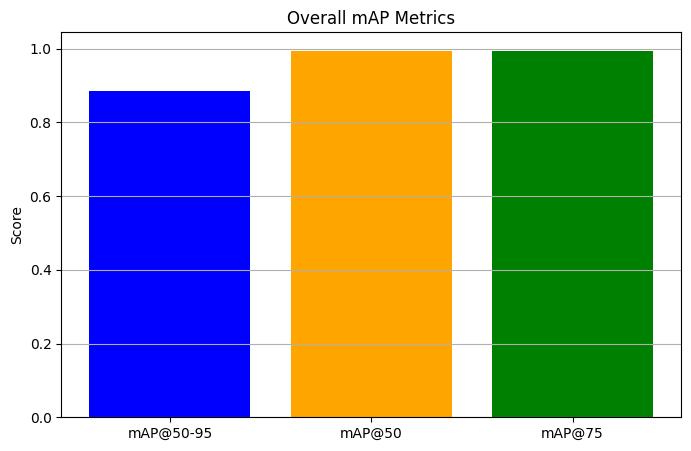

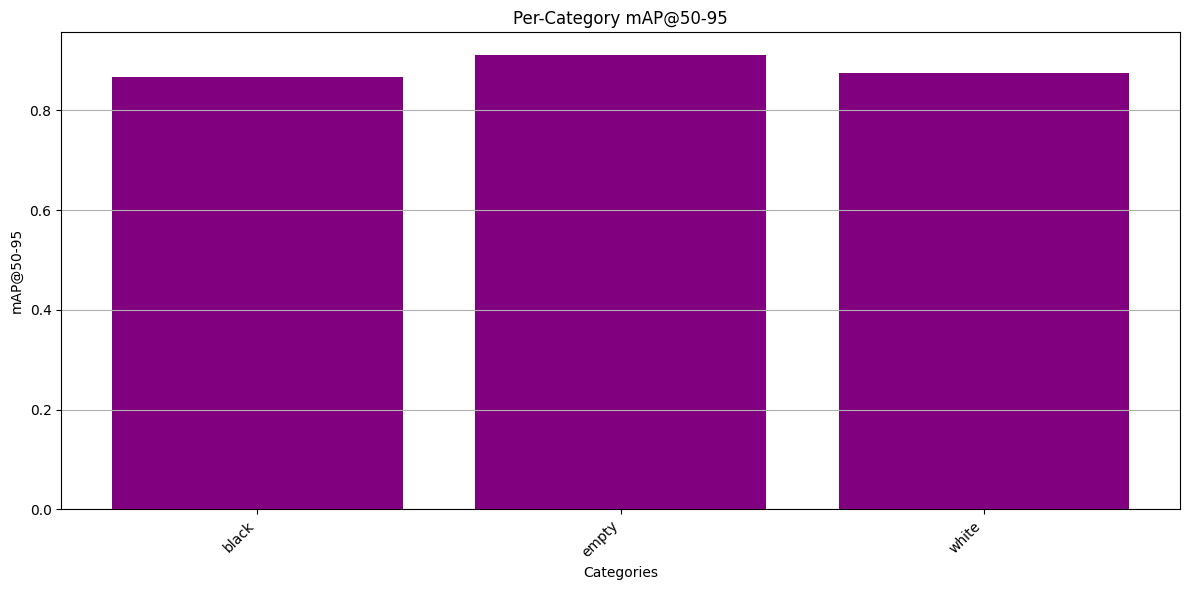

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Extract overall metrics
map50_95 = metrics.box.map  # Overall mAP 50-95
map50 = metrics.box.map50   # mAP at IoU 50
map75 = metrics.box.map75   # mAP at IoU 75
category_maps = metrics.box.maps  # List of mAP 50-95 for each category
class_names = metrics.names  # Dictionary mapping indices to class names

# Map class indices to names
class_labels = [class_names[i] for i in range(len(category_maps))]

# Overall mAP visualization
plt.figure(figsize=(8, 5))
plt.bar(['mAP@50-95', 'mAP@50', 'mAP@75'], [map50_95, map50, map75], color=['blue', 'orange', 'green'])
plt.title('Overall mAP Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Per-category mAP visualization
if category_maps.any():
    x_indices = np.arange(len(category_maps))

    plt.figure(figsize=(12, 6))
    plt.bar(x_indices, category_maps, color='purple')
    plt.title('Per-Category mAP@50-95')
    plt.xlabel('Categories')
    plt.ylabel('mAP@50-95')
    plt.xticks(x_indices, class_labels, rotation=45, ha="right")  # Label bars with class names
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



In [ ]:
# results = model.predict('test_images\IMG_0344.JPEG')
# for r in results:
#     r.show()